# Sentiment Analysis !

In [14]:
# import field
from nltk.corpus import stopwords
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### data load
df = pd.read_csv('tweets_sample.csv', encoding='latin1')

df.head()


,0,1,2,3,4,5
0,4,2065120693,Sun Jun 07 07:56:20 PDT 2009,NO_QUERY,FranQuintanilla,@miaakoch good luck in the concert
1,4,2062854559,Sun Jun 07 00:31:28 PDT 2009,NO_QUERY,superxleyley,will play JL. Be right back.
2,4,1468164662,Tue Apr 07 00:04:05 PDT 2009,NO_QUERY,muserine,@chr15t14n thanks.
3,4,2064955151,Sun Jun 07 07:33:57 PDT 2009,NO_QUERY,onemanrock,@bekasaur thank you so much!!! nice to meet you!
4,4,1998007153,Mon Jun 01 17:50:10 PDT 2009,NO_QUERY,MammaSteph,@RickGershman Totally relate - my mom's a lone...


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


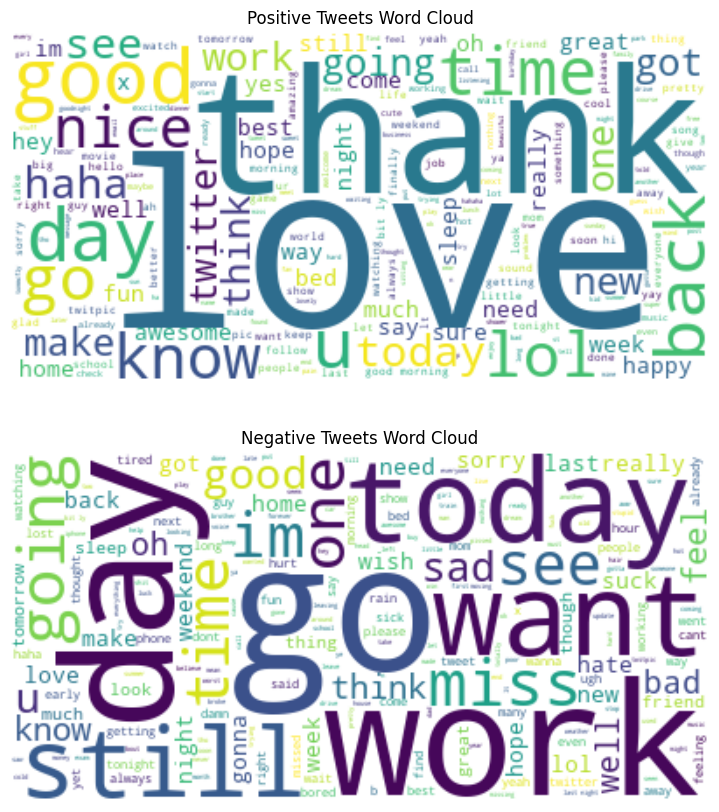

In [19]:

### process text

# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update({'quot', 'amp'})

def process_text(text):
    # 텍스트 소문자로 변환
    text = text.lower()
    # 특수문자, 숫자 제거
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # 불용어 제거 => ' '으로 구분된 통 스트링
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# processed_text 컬럼 생성
df['processed_text'] = df['5'].apply(process_text)

### 워드 클라우드

sample_size = 1000  # 샘플링할 트윗 수

# 샘플링
positive_sample = df[df['0'] == 4].sample(sample_size, random_state=1)
negative_sample = df[df['0'] == 0].sample(sample_size, random_state=1)

# 각각의 워드 클라우드 생성
positive_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(positive_sample['processed_text']))
negative_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(negative_sample['processed_text']))

# plot
plt.figure(figsize=(20,10))
# positive plot
plt.subplot(2,1,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis("off")
# negative plot
plt.subplot(2,1,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()